<a href="https://colab.research.google.com/github/LaurentSeguin/Learning_ML/blob/main/Basics_Of_Computer_Vision_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Pytorch Computer Vision

This notebook contain the basic knowledge to work with computer vision problems.

The following are some common libraries use in computer vision with Pytorch.

  * `torchvision` :- Base Library for Computer Vision in Pytorch
  * `torchvision.dataset` :- get datasets and data loading functions for computer vision
  * `torchvision.model` :- get pretrained computer vision models
  * `torchvision.transform` :- functions for manipulating images to be suitable for an ML model
  * `torch.utils.data.Dataset` :- Base dataset class for Pytorch
  * `torch.utils.data.DataLoader`:- Create a Python iterable over a dataset



In [1]:
# Import Pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

# Check Versions of Pytorch
print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


# 1.0 Getting a dataset

To show the fundamental of computer vision with pytorch, we will use the Fashion MNIST dataset which is considered as a beginner dataset for computer vision.

The Fashion MNIST is a dataset of greyscale pictures of clothing.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download the data?
    train=True,# do we want the training dataset?
    download=True,# do we want to download the dataset?
    transform=ToTensor(),# How to we want to transform the dataset?
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9195214.55it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 167202.26it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 948347.84it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7339319.17it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# let's check the length of the data
len(train_data),len(test_data)


(60000, 10000)

In [4]:
# let look how the first example of the data look like
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# Let's check the different labels in the dataset
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
len(class_names)

10

In [7]:
# Let check do what number, each target class corresponse
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Retrieving the labels for each training examples
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Checking the shape of the images
print(f"Image Shape: {image.shape} -> [color_channels,height,width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image Label: Ankle boot


## 1.1 Visuzlizing the data

Image shape: torch.Size([1, 28, 28])


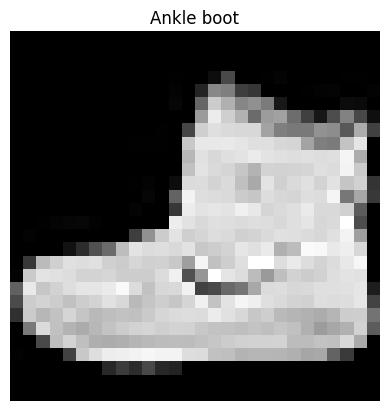

In [10]:
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

Note that imshow expect the data in the format of [height,width,color_channels].Since it is a greyscale image we removed the color dimension using `squeeze`. For color image we will need to `reshape` the tensor

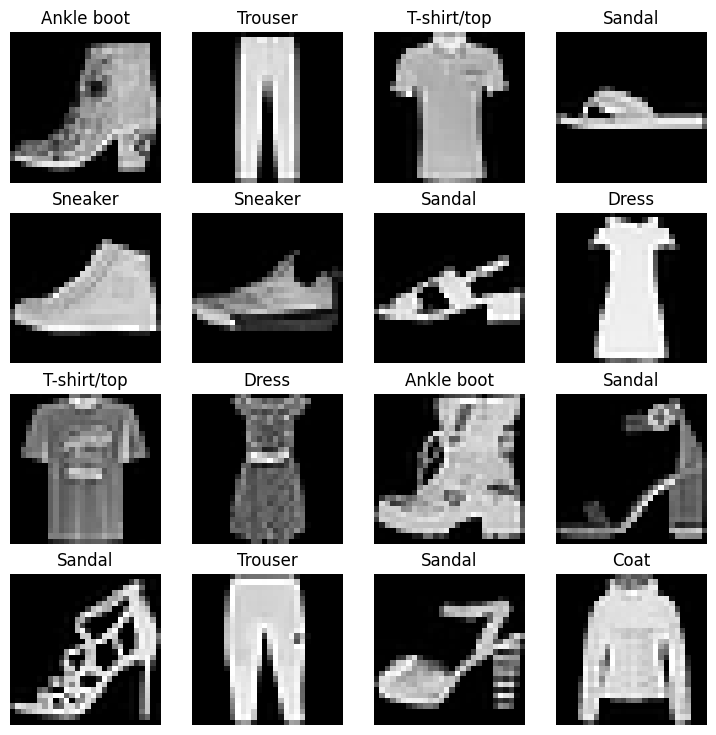

In [11]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

# 2.0 Prepare the dataloader
Dataloader turns our dataset into a python iterable. We will turn the data into batches (mini batches)

Breaking the data into batches is more computationally efficient.
Breaking the data into batches also give the neural network more opportunities to update the gradient through each epochs

In [12]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [13]:
# Looking at some attributes of the dataloader
print(f"Dataloader: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7a3c60f1a1d0>, <torch.utils.data.dataloader.DataLoader object at 0x7a3c60a86620>)
Length of train dataloader:1875 batches of 32...
Length of test dataloader:313 batches of 32...


In [14]:
# Looking inside the training dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

**Note** For the `train_features_batch` we can see the shape is `[32,1,28,28]` which corresponse to `[batch_size,color_channels,height,width]`.

Image Size: torch.Size([1, 28, 28])
Label: 9


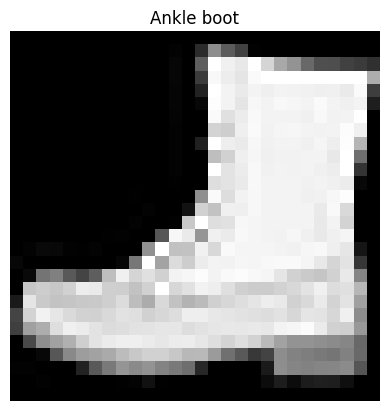

In [15]:
# Show a sample from the dataloader
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}")

# 3.0 Model 0: Baseline Model

The baseline model is a simple model, we will try and improve upon subsequent models/experiments

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()
# Get a single sample
x = train_features_batch[0]
# Flatten the single sample
output = flatten_model(x)
#Print out what happen
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape} -> converted to `[color_chanel,height*width]`")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784]) -> converted to `[color_chanel,height*width]`


In [17]:
# Creating a model class
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.linear_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.linear_stack(x)

In [18]:
torch.manual_seed(42)
# Instantiating an object fromn the model class
model_0=FashionMNISTModelV0(input_shape=784,# 28*28 which corresponse to the height * width
                            hidden_units=10, # number of hidden neurons
                            output_shape=len(class_names)).to("cpu")# number of neurons in the output

In [19]:
model_0

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
# Verifying that the model works using dummy data
dummy_x = torch.randn([1,1,28,28])
model_0(dummy_x)

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

## 3.1 Setup loss, optimizer and evaluation metrics
* Loss Function - Since we are working with multi-class data, we will use `nn.CrossEntropyLoss()` as Loss function

* Optimizer - We will use `torch.optim.SGD()` as Optimizer (Stochastic Gradient Descent)

* Evaluation Metrice - We are working on a classification problem, hence we will be using Accuracy as evaluation metric


In [21]:
import requests
from pathlib import Path

# Download helper function contain some useful functions like accuracy, plot function, etc..

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/LaurentSeguin/Learning_ML/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [22]:
# Import accuracy function from helper function.py
# note that we can also uses torch.metrics
from helper_functions import accuracy_fn
# Setup loss function
loss_fn = nn.CrossEntropyLoss()
# Setup Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## 3.2 Create a Function to time our experiments

Since Machine Learning is very experiment, 2 essential parameters must be tracked:

  1. Model Performance
  2. How fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time"""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
# Testing the function
start_time = timer()
# some code..
end_time = timer()
print_train_time(start_time,end_time,"cpu")

Train time on cpu: 0.000 seconds


4.844099998990714e-05

### 3.3 Creating a training loop and training on batches of the data

Steps:
  1. Loop through epochs.
  2. Loop through traininh batches, perform training steps, calculate the train loss *per batch*
  3. Loop through testing batches, perform testing steps, calculate the test *per batches*
  4. Print out what is happening
  5. Time the process

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 38.699 seconds
